### Student Information
Name: 鄭穎

Student ID: 112062580

GitHub ID: imyingcheng

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__.

# Part 1

## Exercise 1
In this exercise, please print out the *text* data for the first three samples in the dataset.

In [272]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [273]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

In [274]:
# Answer here
for t in twenty_train.data[:3]:
  print(t)

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Background of the problem:
	I have a rectangular mesh in the uv

## Exercise 2
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information.

In [275]:
from google.colab import drive
import os

# mount google drive
drive.mount('/content/drive')

# change work directionary
path = '/content/drive/MyDrive/DM2023-Lab1-Master-main'
os.chdir(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [276]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [277]:
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [278]:
#Answer here
X.query('category == 1')

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
11,From: amjad@eng.umd.edu (Amjad A Soomro) Subje...,1,comp.graphics
14,From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...,1,comp.graphics
15,From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...,1,comp.graphics
...,...,...,...
2232,From: lipman@oasys.dt.navy.mil (Robert Lipman)...,1,comp.graphics
2236,From: dkusswur@falcon.depaul.edu (Daniel C. Ku...,1,comp.graphics
2241,From: dls@aeg.dsto.gov.au (David Silver) Subje...,1,comp.graphics
2242,From: Sean McMains <mcmains@unt.edu> Subject: ...,1,comp.graphics


## Exercise 3
Try to fetch records belonging to the ```sci.med``` category, and query every 10th record. Only show the first 5 records.

In [279]:
# Answer here
X[X['category_name'] == 'sci.med'].iloc[::10][:5]

,text,category,category_name
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
49,From: jimj@contractor.EBay.Sun.COM (Jim Jones)...,2,sci.med
82,From: jason@ab20.larc.nasa.gov (Jason Austin) ...,2,sci.med
118,From: rogers@calamari.hi.com (Andrew Rogers) S...,2,sci.med
142,From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...,2,sci.med


## Exercise 4
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [280]:
# Answer here
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2252    (The amoung of missing records is: , 0)
2253    (The amoung of missing records is: , 0)
2254    (The amoung of missing records is: , 0)
2255    (The amoung of missing records is: , 0)
2256    (The amoung of missing records is: , 0)
Length: 2257, dtype: object

## Exercise 5
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [281]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [282]:
# show whether the element is null
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [283]:
# Answer here

# .isnull() didn't work because not all the null value are accepted. They need to be convert to a uniform and accepted form.
NA_df['missing_example'] = NA_df['missing_example'].replace(['NaN', 'None', None, ''], np.nan)
NA_df['missing_example'].isnull()

0    True
1    True
2    True
3    True
4    True
5    True
Name: missing_example, dtype: bool

## Exercise 6
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [284]:
display(X)

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med


In [285]:
X_sample = X.sample(n=1000, random_state=42)
display(X_sample)

,text,category,category_name
561,From: ray@engr.LaTech.edu (Bill Ray) Subject: ...,2,sci.med
440,From: jkellett@netcom.com (Joe Kellett) Subjec...,3,soc.religion.christian
1513,From: noring@netcom.com (Jon Noring) Subject: ...,2,sci.med
1360,From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...,3,soc.religion.christian
259,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism
...,...,...,...
1316,From: salaris@niblick.ecn.purdue.edu (Rrrrrrrr...,3,soc.religion.christian
592,From: sandvik@newton.apple.com (Kent Sandvik) ...,0,alt.atheism
1965,From: uad1126@tdc.dircon.co.uk (Robert Palmer)...,3,soc.religion.christian
363,From: mdpyssc@fs1.mcc.ac.uk (Sue Cunningham) S...,1,comp.graphics


In [286]:
# Answer here

# Possible changes from the X datafram to the X_sample dataframe include:

#   1. Data Distribution: If elements in the original sequence are duplicated, the frequency of occurrence of these elements may change in the new sequence because they are sampled more or less frequently.

#   2. Sequence Order: The order of elements in the original sequence will be shuffled, creating a new sequence.

#   3. Randomness of Data: Since sampling is random, different executions may yield different results.

#   4. Sequence Size: The size of the new sequence is determined by the sampling quantity you specify, which may result in a change in the overall size of the sequence.

## Exercise 7
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

In [287]:
import matplotlib.pyplot as plt
%matplotlib inline

277
sci.med                   277
soc.religion.christian    270
comp.graphics             247
alt.atheism               206
Name: category_name, dtype: int64


<Axes: title={'center': 'Category distribution'}>

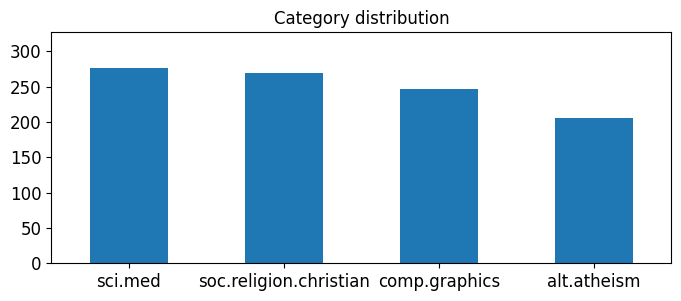

In [288]:
# Answer here

print(max(X_sample.category_name.value_counts()))

# set upper bound of y
upper_bound = max(X_sample.category_name.value_counts() + 50)

print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar', title = 'Category distribution', ylim = [0, upper_bound],
                                           rot = 0, fontsize = 12, figsize = (8,3))

## Exercise 8
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for.

![alt txt](https://i.imgur.com/9eO431H.png)

Text(0.5, 1.0, 'Category distribution')

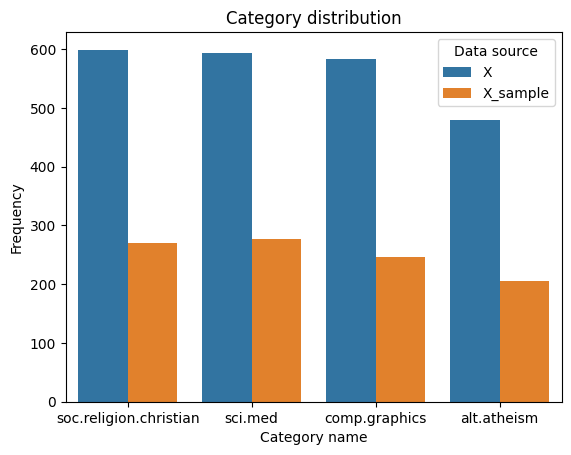

In [289]:
# Answer here
from ipywidgets.widgets.widget_string import Label
import seaborn as sns

# set upper bound of y
upper_bound = max(max(X.category_name.value_counts()), max(X_sample.category_name.value_counts())) + 50

# initialize DataFrame as input data of barplot
df = pd.DataFrame([], columns=['Category name', 'Data source', 'Frequency'])

# fill the DataFrame
label = []
for i in range(len(X.category_name.value_counts())):
  label.append('X')
df = pd.concat([df, pd.DataFrame({'Category name': X.category_name.value_counts().index, 'Data source': label, 'Frequency': X.category_name.value_counts()})], ignore_index=True)
label = []
for i in range(len(X_sample.category_name.value_counts())):
  label.append('X_sample')
df = pd.concat([df, pd.DataFrame({'Category name': X_sample.category_name.value_counts().index, 'Data source': label, 'Frequency': X_sample.category_name.value_counts()})], ignore_index=True)

# plot bar chart
ax = sns.barplot(x='Category name', y='Frequency', hue='Data source', data=df)
ax.set_title('Category distribution')

## Exercise 9
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [290]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()

# learn the vocabulary and return document-term matrix
X_counts = count_vect.fit_transform(X.text)

In [291]:
display(X_counts)

<2257x35788 sparse matrix of type '<class 'numpy.int64'>'
	with 365886 stored elements in Compressed Sparse Row format>

In [292]:
analyze = count_vect.build_analyzer()

In [293]:
# extract words in specified document
analyze(X.text[0])

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

## Exercise 10
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [294]:
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [295]:
# Answer here

# find target index
index = np.where(X_counts[4, 0:100].toarray() == 1)[1]
print('index: ', index[1])
# use the target to find the corressponding word
print('term: ', count_vect.get_feature_names_out()[index[1]])

index:  37
term:  01


## Exercise 11
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [296]:
# I will use the inverted index to store the data occurence, instead of term-document matrix
# Inverted index is to record the occurrence of each word and its position in which document
from collections import defaultdict

# build inverted index from given document
def build_inverted_index(documents):
    inverted_index = defaultdict(list)

    for doc_id, doc_text in enumerate(documents):
        words = analyze(doc_text)
        for word in words:
          if doc_id not in inverted_index[word]:
            inverted_index[word].append(doc_id)
    return inverted_index

def show_inverted_index(inverted_index):
    for word, positions in inverted_index.items():
        print(f"{word}: {positions}")

documents = []
for text in X.text:
  documents.append(text)
inverted_index = build_inverted_index(documents)
show_inverted_index(inverted_index)

串流輸出內容已截斷至最後 5000 行。
montelione: [1665]
45pm: [1665]
predicting: [1665, 2253]
carcinogenesis: [1665]
rodents: [1665, 1787]
bahler: [1665]
bristol: [1665]
senex: [1665]
clos: [1665]
clim: [1665]
mah: [1665]
homology: [1665]
califano: [1665]
rigoutsos: [1665]
stolfo: [1665]
salient: [1665]
cherkauer: [1665]
dubchak: [1665]
holbrook: [1665]
gracy: [1665]
chiche: [1665]
sallantin: [1665]
guidi: [1665]
roderick: [1665]
sibbald: [1665]
grammatical: [1665]
formalization: [1665]
hofestedt: [1665]
riley: [1665, 1705]
kettler: [1665]
darden: [1665]
kochut: [1665]
lefevre: [1665]
ikeda: [1665]
multimap: [1665]
linkage: [1665, 2121]
matise: [1665]
perlin: [1665]
chakravarti: [1665]
fluorescence: [1665]
matsushima: [1665]
splice: [1665]
junction: [1665]
nguifo: [1665]
prokaryotic: [1665]
genomes: [1665]
perriere: [1665]
dorkeld: [1665]
rechenmann: [1665]
gautier: [1665]
reddy: [1665, 1802]
liebman: [1665]
reggia: [1665]
chou: [1665]
armentrout: [1665]
peng: [1665]
schmeltzer: [1665]
medigue: [1665]

## Exercise 12
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [297]:
from sklearn.decomposition import PCA

In [298]:
# Answer here

# reduce the dimension to 3
X_reduced_3D = PCA(n_components = 3).fit_transform(X_counts.toarray())
print(X_reduced_3D.shape)

(2257, 3)


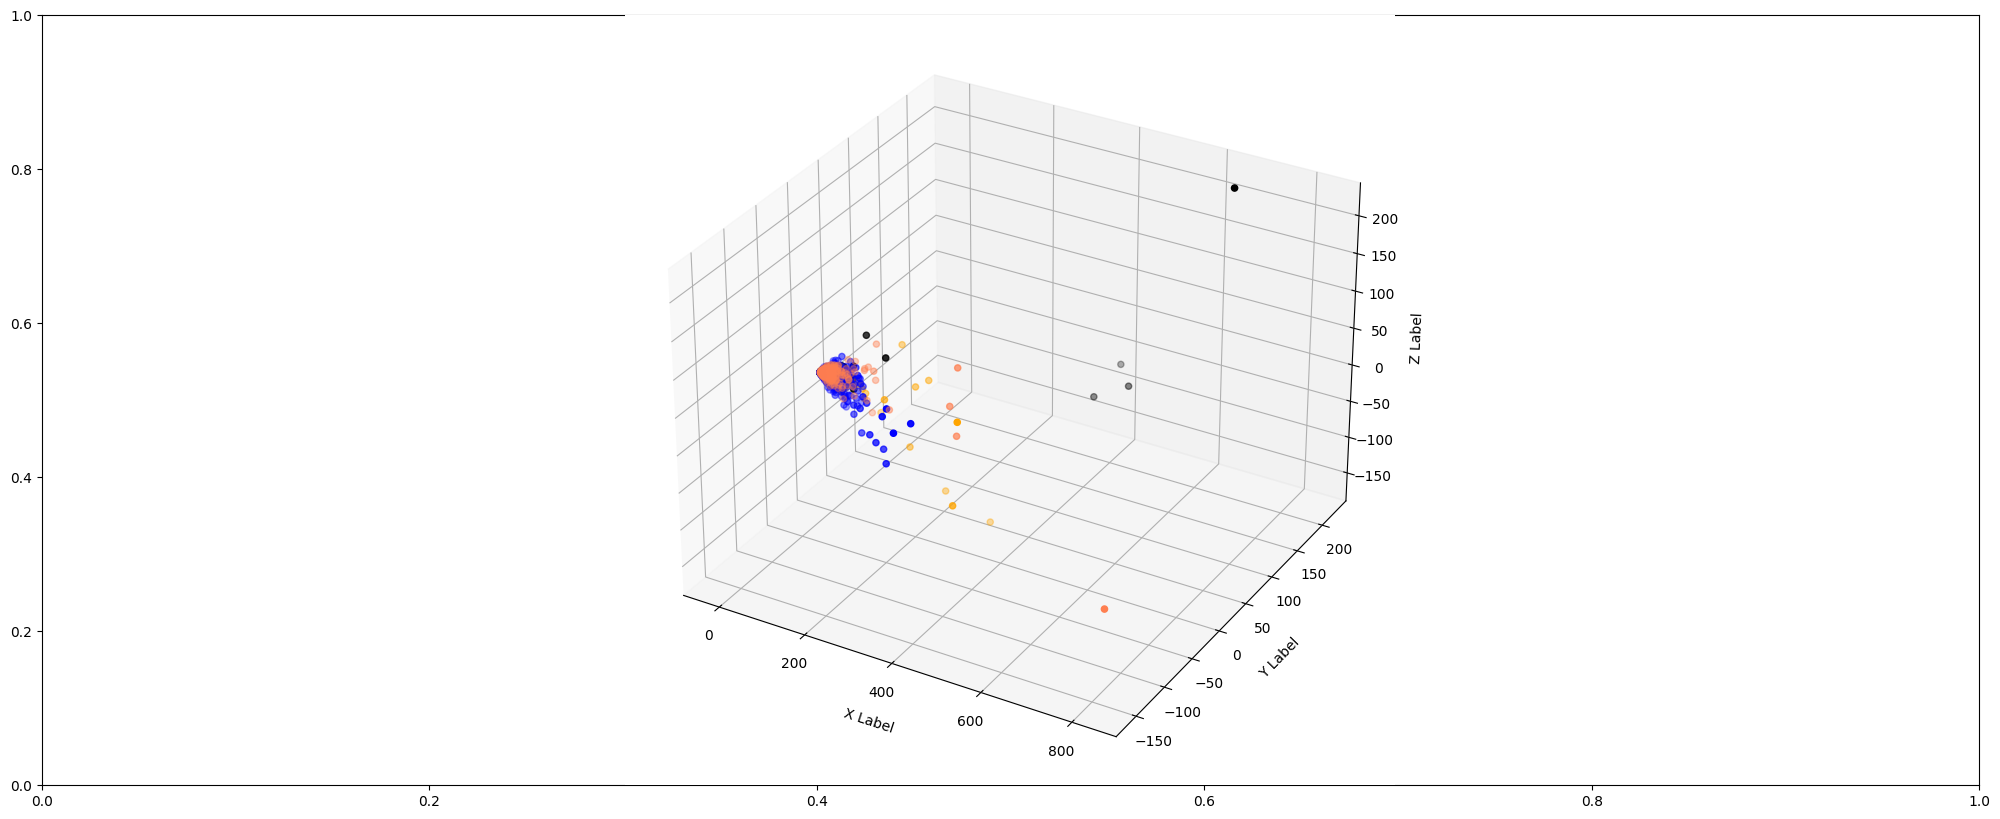

In [299]:
col = ['coral', 'blue', 'black', 'orange']

# set the figure size
fig = plt.figure(figsize = (25,10))

# build subplot
ax = fig.subplots()
ax = fig.add_subplot(111, projection='3d')

# build information that will be showed in the scatter plot
for c, category in zip(col, categories):
    xs = X_reduced_3D[X['category_name'] == category].T[0]
    ys = X_reduced_3D[X['category_name'] == category].T[1]
    zs = X_reduced_3D[X['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs, c = c, marker='o')

# set the figure attribute
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

## Exercise 13
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [300]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []

# a worse way to build term frequency list
print(X_counts.shape[1])
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

#[3, 8, 5, 2, 5, 8, 2, 5, 3, 2]

35788


In [301]:
# a better way to build term frequency list
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [302]:
# Answer here
import plotly.graph_objects as go

# use plotly to plot bar chart
fig = go.Figure(data=[go.Bar(x=count_vect.get_feature_names_out()[:300], y=term_frequencies[:300])])
fig.update_layout(title='Plot using plotly', xaxis_title='Terms', yaxis_title='Frequency')
fig.show()

## Exercise 14
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise.


In [303]:
# Answer here

# pick top 30
top30 = sorted(zip(count_vect.get_feature_names_out()[:], term_frequencies[:]), key=lambda x: x[1], reverse=True)[:30]
top30_term, top30_frequency = zip(*top30)

# use plotly to plot bar chart
fig = go.Figure(data=[go.Bar(x=top30_term, y=top30_frequency)])
fig.update_layout(title='Top 30 terms', xaxis_title='Terms', yaxis_title='Frequency')
fig.show()

## Exercise 15
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [304]:
# Answer here

# pick top 300 to show
top300 = sorted(zip(count_vect.get_feature_names_out()[:], term_frequencies[:]), key=lambda x: x[1], reverse=True)[:300]
top300_term, top300_frequency = zip(*top300)

# use plotly to plot bar chart
fig = go.Figure(data=[go.Bar(x=top300_term, y=top300_frequency)])
fig.update_layout(title='Top 300 terms', xaxis_title='Terms', yaxis_title='Frequency')
fig.show()

## Exercise 16
Try to generate the binarization using the `category_name` column instead. Does it work?

In [305]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [306]:
# convert labels to one hot encoding
mlb = preprocessing.LabelBinarizer()

In [307]:
# Answer here
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]
# Based on the result shows below, it can generate the binarization using the 'category_name' column

,text,category,category_name,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]"


# Part 2

## Data Preparation

In [160]:
import os

# change work directory
path = '/content/drive/MyDrive/DM2023-Lab1-Master-main/Homework/sentiment-labelled-sentences'
os.chdir(path)

In [161]:
# read data from given file
file_names = ['amazon_cells_labelled.txt', 'imdb_labelled.txt', 'yelp_labelled.txt']
data = {'sentence': [], 'score': [], 'source': []}
for file_name in file_names:
  with open(file_name, 'r') as file:
    source = file_name[:file_name.index('_')]
    for line in file:
      sentence, score = line.strip().split('\t')
      data['sentence'].append(sentence.strip())
      data['score'].append(score)
      data['source'].append(source)

In [162]:
len(data['sentence'])

3000

In [163]:
len(data['score'])

3000

In [164]:
len(data['source'])

3000

## Data Transformation

### Converting Dictionary into Pandas Dataframe

In [165]:
# change work directory
path = '/content/drive/MyDrive/DM2023-Lab1-Master-main'
os.chdir(path)
import helpers.data_mining_helpers as dmh
import pandas as pd

In [166]:
# build DataFrame
X = pd.DataFrame.from_records(dmh.format_sentence(data), columns=['sentence'])

In [167]:
len(X)

3000

### Adding Columns

In [168]:
# add column
X['score'] = data['score']

In [169]:
X['sentiment'] = X.score.apply(lambda x: 'positive' if x == '1' else 'negative')

In [170]:
X['source'] = data['source']

In [171]:
display(X)

,sentence,score,sentiment,source
0,So there is no way for me to plug it in here i...,0,negative,amazon
1,"Good case, Excellent value.",1,positive,amazon
2,Great for the jawbone.,1,positive,amazon
3,Tied to charger for conversations lasting more...,0,negative,amazon
4,The mic is great.,1,positive,amazon
...,...,...,...,...
2995,I think food should have flavor and texture an...,0,negative,yelp
2996,Appetite instantly gone.,0,negative,yelp
2997,Overall I was not impressed and would not go b...,0,negative,yelp
2998,"The whole experience was underwhelming, and I ...",0,negative,yelp


### Query

In [172]:
X[-10:]

,sentence,score,sentiment,source
2990,The refried beans that came with my meal were ...,0,negative,yelp
2991,Spend your money and time some place else.,0,negative,yelp
2992,A lady at the table next to us found a live gr...,0,negative,yelp
2993,the presentation of the food was awful.,0,negative,yelp
2994,I can't tell you how disappointed I was.,0,negative,yelp
2995,I think food should have flavor and texture an...,0,negative,yelp
2996,Appetite instantly gone.,0,negative,yelp
2997,Overall I was not impressed and would not go b...,0,negative,yelp
2998,"The whole experience was underwhelming, and I ...",0,negative,yelp
2999,"Then, as if I hadn't wasted enough of my life ...",0,negative,yelp


In [173]:
# use loc to query (by label)
X.loc[:10, 'sentence']

0     So there is no way for me to plug it in here i...
1                           Good case, Excellent value.
2                                Great for the jawbone.
3     Tied to charger for conversations lasting more...
4                                     The mic is great.
5     I have to jiggle the plug to get it to line up...
6     If you have several dozen or several hundred c...
7           If you are Razr owner...you must have this!
8                   Needless to say, I wasted my money.
9                      What a waste of money and time!.
10                      And the sound quality is great.
Name: sentence, dtype: object

In [174]:
# use iloc to query (by position)
X.iloc[:10, 0]

0    So there is no way for me to plug it in here i...
1                          Good case, Excellent value.
2                               Great for the jawbone.
3    Tied to charger for conversations lasting more...
4                                    The mic is great.
5    I have to jiggle the plug to get it to line up...
6    If you have several dozen or several hundred c...
7          If you are Razr owner...you must have this!
8                  Needless to say, I wasted my money.
9                     What a waste of money and time!.
Name: sentence, dtype: object

In [175]:
X.query('score == "1"')

,sentence,score,sentiment,source
1,"Good case, Excellent value.",1,positive,amazon
2,Great for the jawbone.,1,positive,amazon
4,The mic is great.,1,positive,amazon
7,If you are Razr owner...you must have this!,1,positive,amazon
10,And the sound quality is great.,1,positive,amazon
...,...,...,...,...
2899,"Overall, a great experience.",1,positive,yelp
2901,Their regular toasted bread was equally satisf...,1,positive,yelp
2907,The chips and sals a here is amazing!!!!!!!!!!...,1,positive,yelp
2909,This is my new fav Vegas buffet spot.,1,positive,yelp


## Data Mining using Pandas

### Missing Values

In [176]:
# check null value
X.isnull()

,sentence,score,sentiment,source
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
2995,False,False,False,False
2996,False,False,False,False
2997,False,False,False,False
2998,False,False,False,False


In [177]:
# count number of null values (by column)
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,sentiment,source
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0


In [178]:
# count number of null values (by row)
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2995    (The amoung of missing records is: , 0)
2996    (The amoung of missing records is: , 0)
2997    (The amoung of missing records is: , 0)
2998    (The amoung of missing records is: , 0)
2999    (The amoung of missing records is: , 0)
Length: 3000, dtype: object

### Dealing with Duplicate Data

In [179]:
# check duplicated values
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [180]:
# count the number of duplicated value
sum(X.duplicated())

17

In [181]:
len(X)

3000

In [182]:
# drop the duplicated values (keep the fisrt one)
X.drop_duplicates(keep='first', inplace=True)

In [183]:
len(X)

2983

## Data Preprocessing

### Sampling

In [184]:
# sampling
X_sample = X.sample(n=1000,random_state=0)
display(X_sample)

,sentence,score,sentiment,source
22,The commercials are the most misleading.,0,negative,amazon
1695,Highly recommended A+,1,positive,imdb
2665,The sweet potato tots were good but the onion ...,1,positive,yelp
1920,The story line is totally predictable.,0,negative,imdb
156,"Nice quality build, unlike some cheap s*** out...",1,positive,amazon
...,...,...,...,...
1485,"This movie was kind of long in length, but I e...",1,positive,imdb
1622,But above all the exquisite visual composition...,1,positive,imdb
1195,But this movie is definitely a below average r...,0,negative,imdb
1699,") very bad performance plays Angela Bennett, a...",0,negative,imdb


In [185]:
len(X_sample)

1000

imdb      997
yelp      996
amazon    990
Name: source, dtype: int64


<Axes: title={'center': 'Source distribution'}>

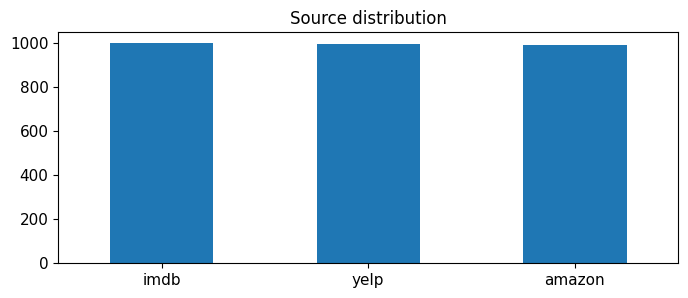

In [186]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the source distribution of the original data
print(X.source.value_counts())
upper_bound = max(X.source.value_counts()) + 50
X.source.value_counts().plot(kind = 'bar', title = 'Source distribution', ylim = [0, upper_bound],
                                    rot = 0, fontsize = 11, figsize = (8,3))

   Source Sentiment  Frequency
0  Amazon  Positive        493
1  Amazon  Negative        497
2    IMDb  Positive        498
3    IMDb  Negative        499
4    Yelp  Positive        499
5    Yelp  Negative        497


Text(0.5, 1.0, 'Sentiment distribution')

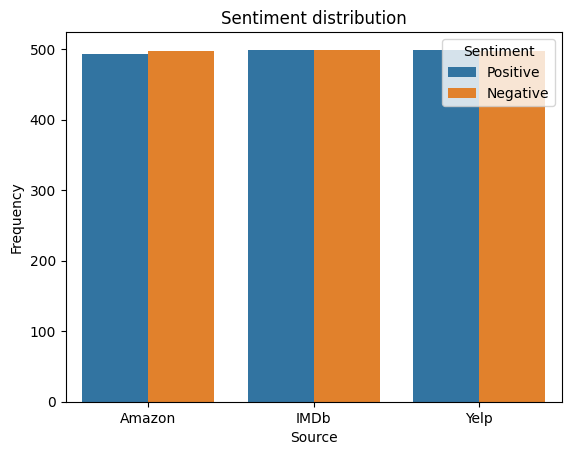

In [187]:
import seaborn as sns

# plot the sentiment distribution of the original data
df = pd.DataFrame([['Amazon', 'Positive', len(X.query('source == "amazon" and score == "1"'))],
                   ['Amazon', 'Negative', len(X.query('source == "amazon" and score == "0"'))],
                   ['IMDb', 'Positive', len(X.query('source == "imdb" and score == "1"'))],
                   ['IMDb', 'Negative', len(X.query('source == "imdb" and score == "0"'))],
                   ['Yelp', 'Positive', len(X.query('source == "yelp" and score == "1"'))],
                   ['Yelp', 'Negative', len(X.query('source == "yelp" and score == "0"'))]
                   ], columns=['Source', 'Sentiment', 'Frequency'])
print(df)
ax = sns.barplot(x='Source', y='Frequency', hue='Sentiment', data=df)
ax.set_title('Sentiment distribution')

amazon    348
imdb      334
yelp      318
Name: source, dtype: int64


<Axes: title={'center': 'Source distribution'}>

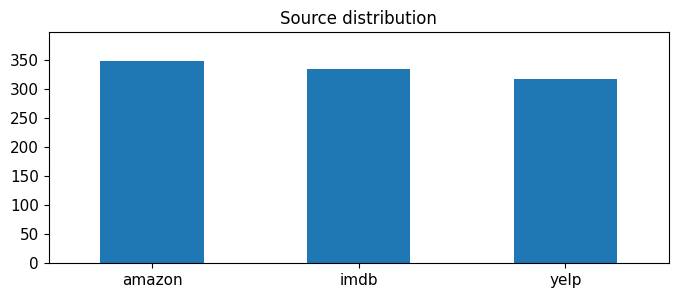

In [188]:
print(X_sample.source.value_counts())
upper_bound = max(X_sample.source.value_counts()) + 50

# plot the source distribution of the sampled data
X_sample.source.value_counts().plot(kind = 'bar', title = 'Source distribution', ylim = [0, upper_bound],
                                    rot = 0, fontsize = 11, figsize = (8,3))

   Source Sentiment  Frequency
0  Amazon  Positive        161
1  Amazon  Negative        187
2    IMDb  Positive        169
3    IMDb  Negative        165
4    Yelp  Positive        166
5    Yelp  Negative        152


Text(0.5, 1.0, 'Sentiment distribution')

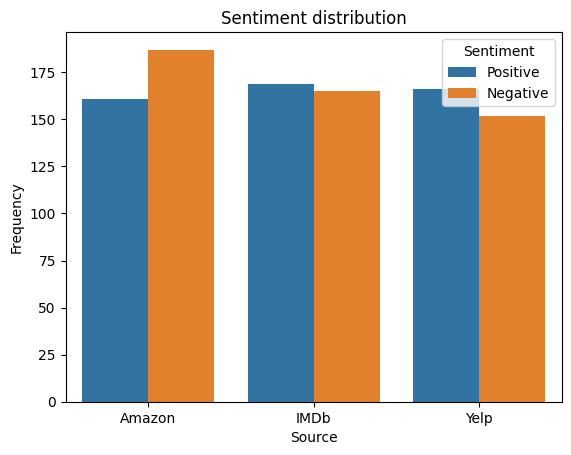

In [189]:
# plot the sentiment distribution of the sampled data
df = pd.DataFrame([['Amazon', 'Positive', len(X_sample.query('source == "amazon" and score == "1"'))],
                   ['Amazon', 'Negative', len(X_sample.query('source == "amazon" and score == "0"'))],
                   ['IMDb', 'Positive', len(X_sample.query('source == "imdb" and score == "1"'))],
                   ['IMDb', 'Negative', len(X_sample.query('source == "imdb" and score == "0"'))],
                   ['Yelp', 'Positive', len(X_sample.query('source == "yelp" and score == "1"'))],
                   ['Yelp', 'Negative', len(X_sample.query('source == "yelp" and score == "0"'))]
                   ], columns=['Source', 'Sentiment', 'Frequency'])
print(df)
ax = sns.barplot(x='Source', y='Frequency', hue='Sentiment', data=df)
ax.set_title('Sentiment distribution')

### Feature Creation

In [190]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [191]:
# extract words of each sentence
X['unigrams'] = X['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [192]:
X[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [193]:
X[0:4]

,sentence,score,sentiment,source,unigrams
0,So there is no way for me to plug it in here i...,0,negative,amazon,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,positive,amazon,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,positive,amazon,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,negative,amazon,"[Tied, to, charger, for, conversations, lastin..."


In [194]:
list(X[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

### Feature Subset Selection

In [195]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()

# learn the vocabulary and return document-term matrix
X_counts = count_vect.fit_transform(X.sentence)
print(X_counts.shape)
print(X_counts[0])

(2983, 5155)
  (0, 4161)	1
  (0, 4545)	1
  (0, 2427)	1
  (0, 3043)	1
  (0, 4987)	1
  (0, 1829)	1
  (0, 2809)	1
  (0, 4609)	1
  (0, 3387)	1
  (0, 2432)	1
  (0, 2314)	2
  (0, 2158)	1
  (0, 4531)	1
  (0, 4835)	1
  (0, 4793)	1
  (0, 1982)	1
  (0, 647)	1
  (0, 1013)	1


In [196]:
count_vect.get_feature_names_out()[4017]

'sharing'

In [197]:
analyze = count_vect.build_analyzer()

# extract words in specified sentence
analyze(X.sentence[0])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

### Dimensionality Reduction

In [198]:
from sklearn.decomposition import PCA

In [199]:
print(X_counts.shape)

# reduce the dimension to 2
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
print(X_reduced.shape)

(2983, 5155)
(2983, 2)


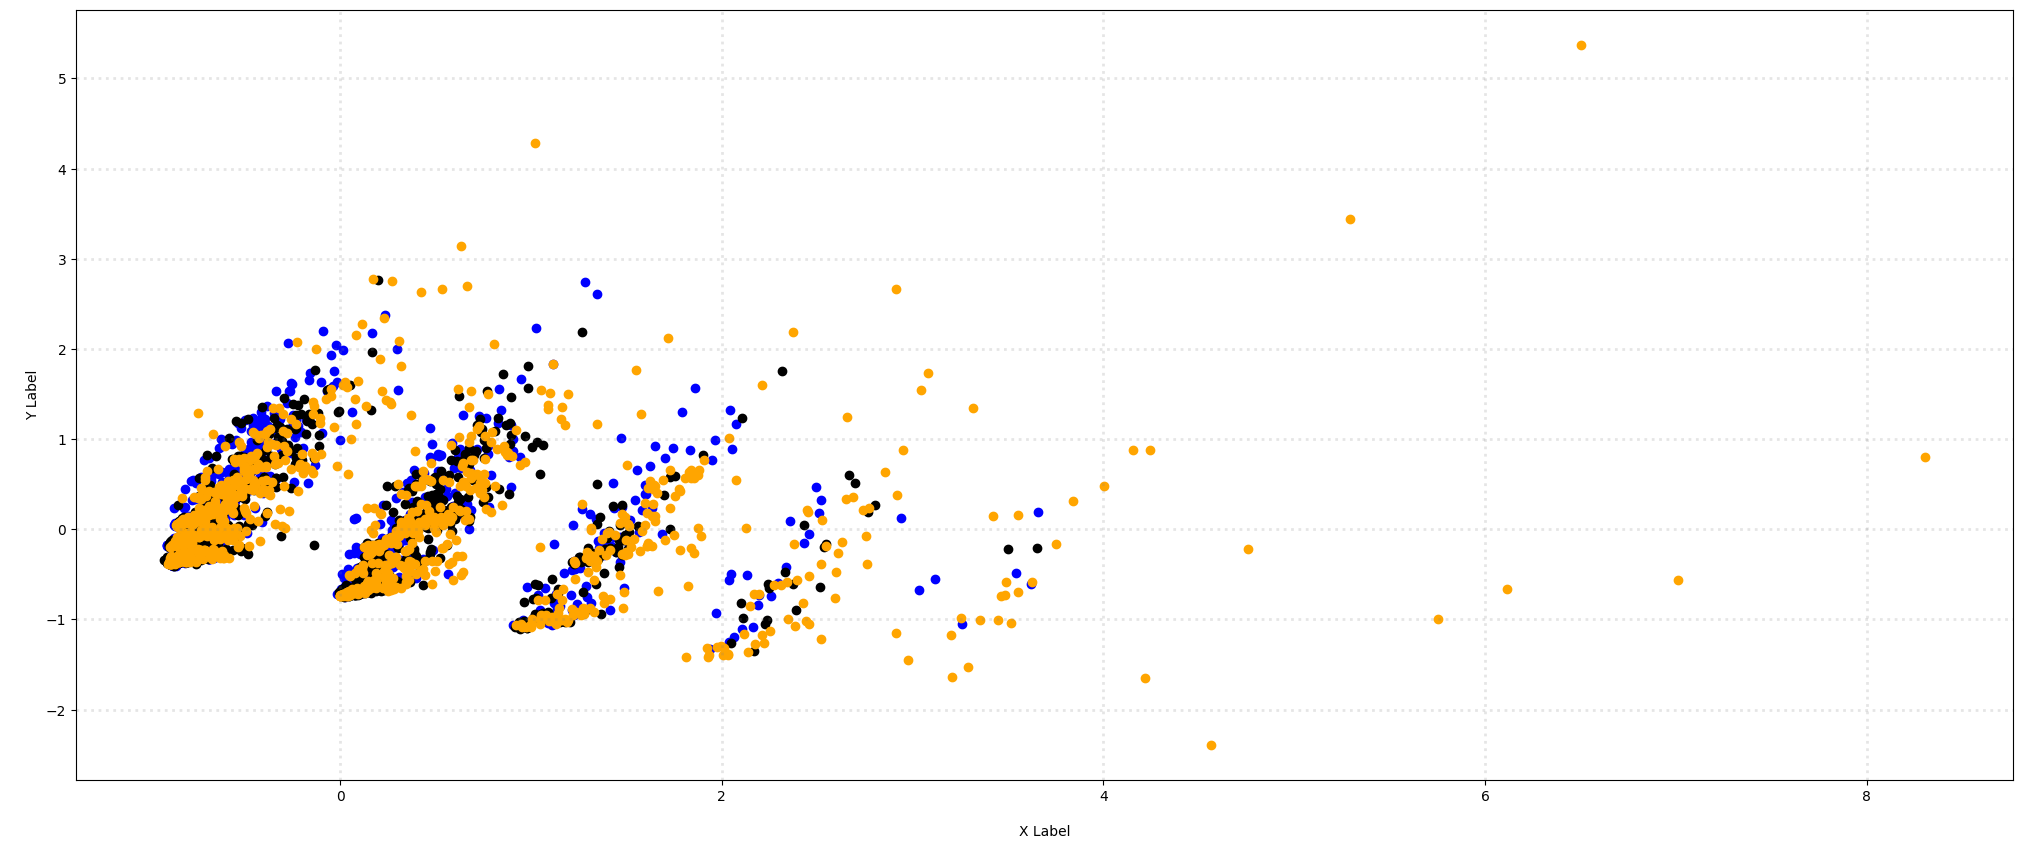

In [200]:
# define the source and the color list
sources = ['amazon', 'yelp', 'imdb']
color = ['blue', 'black', 'orange']

# set the figure size and build subplot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

# build informaiton that will be showedd in the scatter plot
for c, source in zip(color, sources):
    xs = X_reduced[X['source'] == source].T[0]
    ys = X_reduced[X['source'] == source].T[1]
    ax.scatter(xs, ys, c = c, marker='o')

# set the figure attribute
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

(2983, 3)


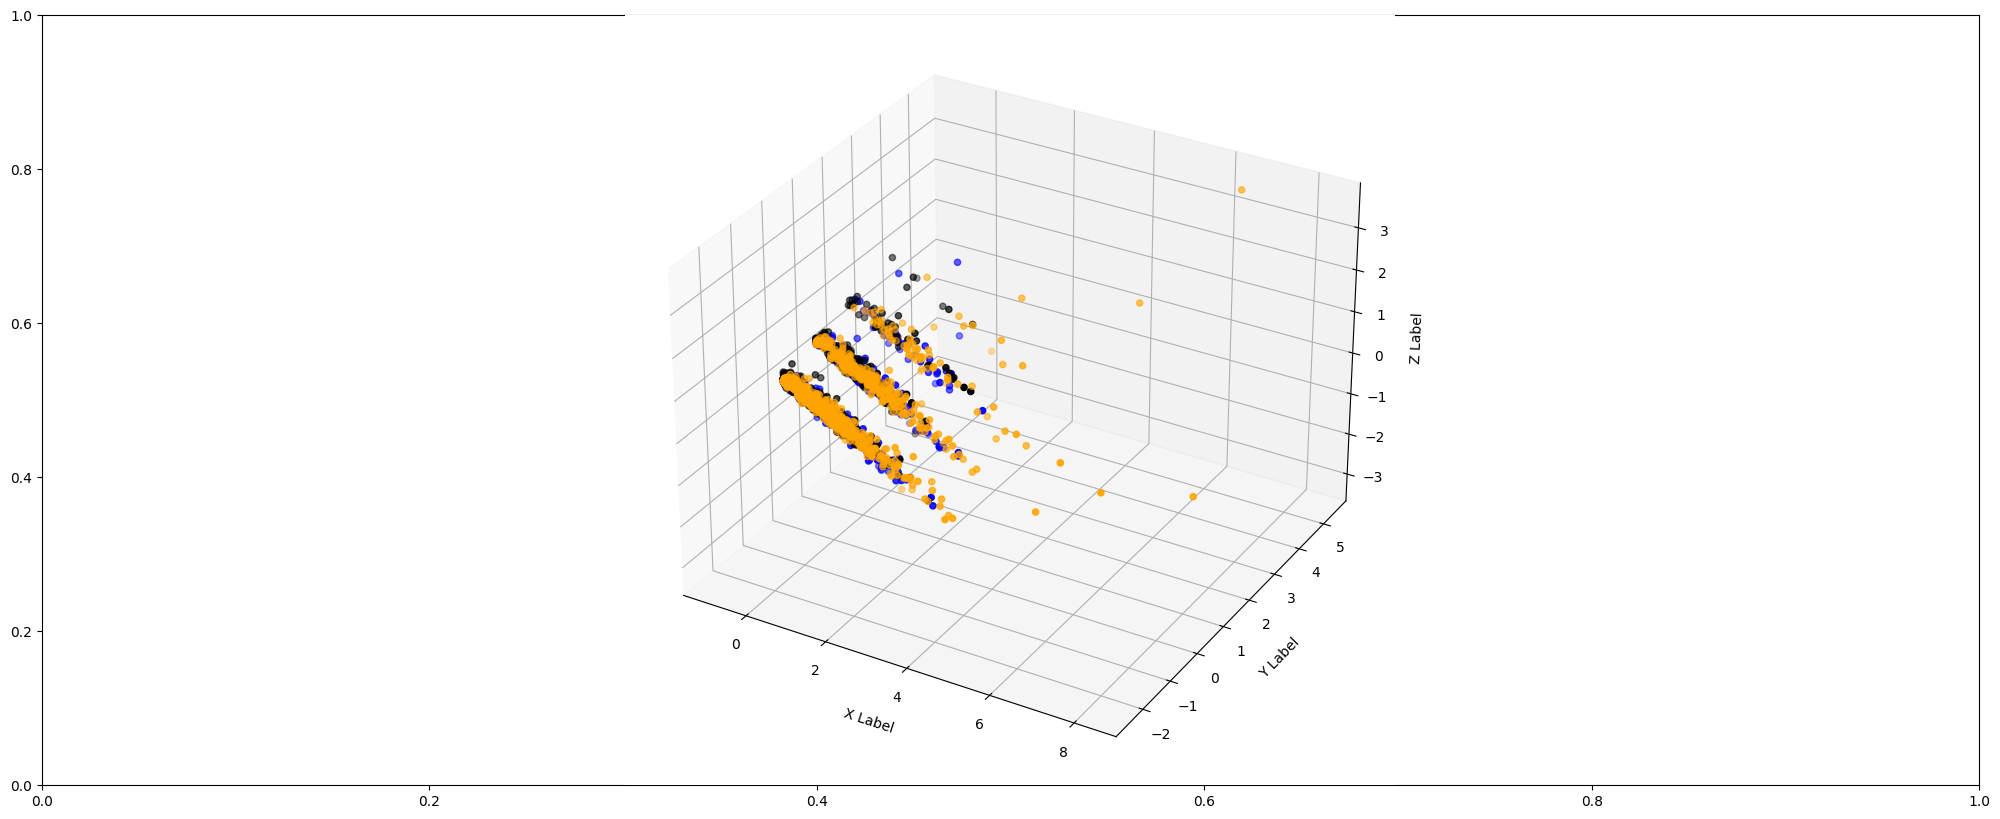

In [201]:
# reduce the dimension to 3
X_reduced_3D = PCA(n_components = 3).fit_transform(X_counts.toarray())
print(X_reduced_3D.shape)

# set the figure size and build subplot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()
ax = fig.add_subplot(111, projection='3d')

# build information that will be showed in the scatter plot
for c, source in zip(color, sources):
    xs = X_reduced_3D[X['source'] == source].T[0]
    ys = X_reduced_3D[X['source'] == source].T[1]
    zs = X_reduced_3D[X['source'] == source].T[2]
    ax.scatter(xs, ys, zs, c = c, marker='o')

# set the figure attribute
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

### Attribute Transformation / Aggregation

In [202]:
term_frequencies = []

# a worse way to build term frequency list
print(X_counts.shape[1])
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

5155


In [203]:
import numpy as np

# a better way to build term frequency list
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [204]:
term_frequencies[0]

1

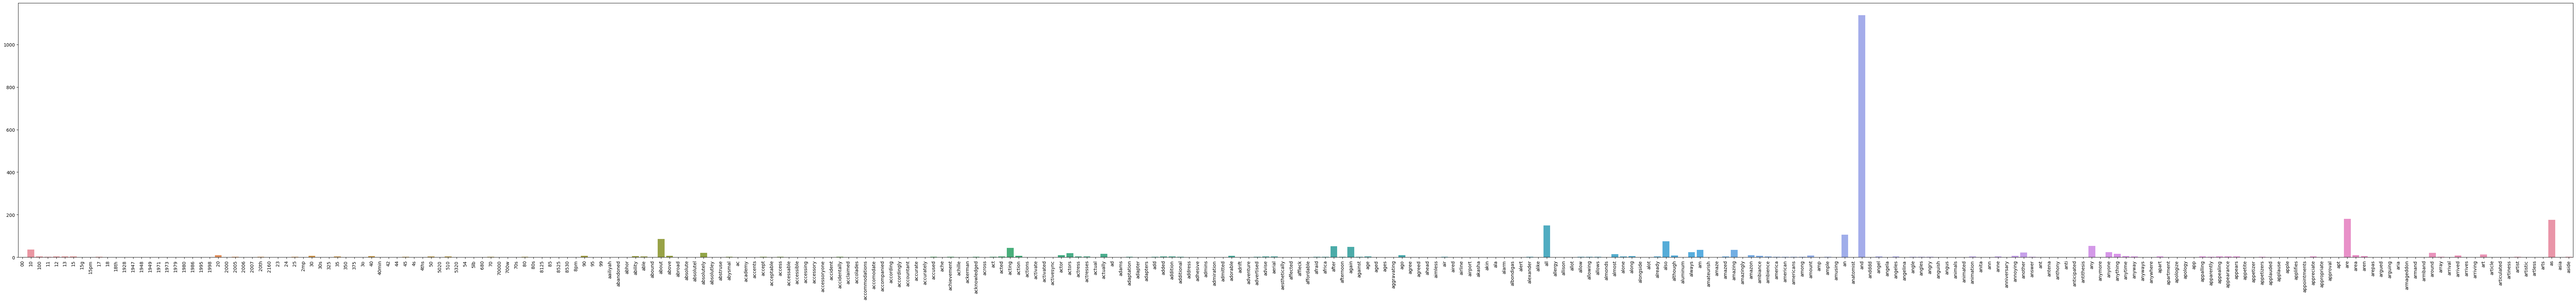

In [205]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [206]:
import plotly.graph_objects as go

# use plotly to plot bar chart
fig = go.Figure(data=[go.Bar(x=count_vect.get_feature_names_out()[:300], y=term_frequencies[:300])])
fig.update_layout(title='Plot using plotly', xaxis_title='Terms', yaxis_title='Frequency')
fig.show()

In [207]:
# pick top 30 to show
top30 = sorted(zip(count_vect.get_feature_names_out()[:], term_frequencies[:]), key=lambda x: x[1], reverse=True)[:30]
top30_term, top30_frequency = zip(*top30)

# use plotly to plot bar chart
fig = go.Figure(data=[go.Bar(x=top30_term, y=top30_frequency)])
fig.update_layout(title='Top 30 terms', xaxis_title='Terms', yaxis_title='Frequency')
fig.show()

In [208]:
# pick top 300 to show
top300 = sorted(zip(count_vect.get_feature_names_out()[:], term_frequencies[:]), key=lambda x: x[1], reverse=True)[:300]
top300_term, top300_frequency = zip(*top300)

# use plotly to plot bar chart
fig = go.Figure(data=[go.Bar(x=top300_term, y=top300_frequency)])
fig.update_layout(title='Top 300 terms', xaxis_title='Terms', yaxis_title='Frequency')
fig.show()

In [209]:
import math

# calculate log of term frequency
term_frequencies_log = [math.log(i) for i in term_frequencies]

[Text(0, 0, '00'),
 Text(1, 0, '10'),
 Text(2, 0, '100'),
 Text(3, 0, '11'),
 Text(4, 0, '12'),
 Text(5, 0, '13'),
 Text(6, 0, '15'),
 Text(7, 0, '15g'),
 Text(8, 0, '15pm'),
 Text(9, 0, '17'),
 Text(10, 0, '18'),
 Text(11, 0, '18th'),
 Text(12, 0, '1928'),
 Text(13, 0, '1947'),
 Text(14, 0, '1948'),
 Text(15, 0, '1949'),
 Text(16, 0, '1971'),
 Text(17, 0, '1973'),
 Text(18, 0, '1979'),
 Text(19, 0, '1980'),
 Text(20, 0, '1986'),
 Text(21, 0, '1995'),
 Text(22, 0, '1998'),
 Text(23, 0, '20'),
 Text(24, 0, '2000'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '20th'),
 Text(29, 0, '2160'),
 Text(30, 0, '23'),
 Text(31, 0, '24'),
 Text(32, 0, '25'),
 Text(33, 0, '2mp'),
 Text(34, 0, '30'),
 Text(35, 0, '30s'),
 Text(36, 0, '325'),
 Text(37, 0, '35'),
 Text(38, 0, '350'),
 Text(39, 0, '375'),
 Text(40, 0, '3o'),
 Text(41, 0, '40'),
 Text(42, 0, '40min'),
 Text(43, 0, '42'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '4s'),
 Text(47, 0, '4ths'),


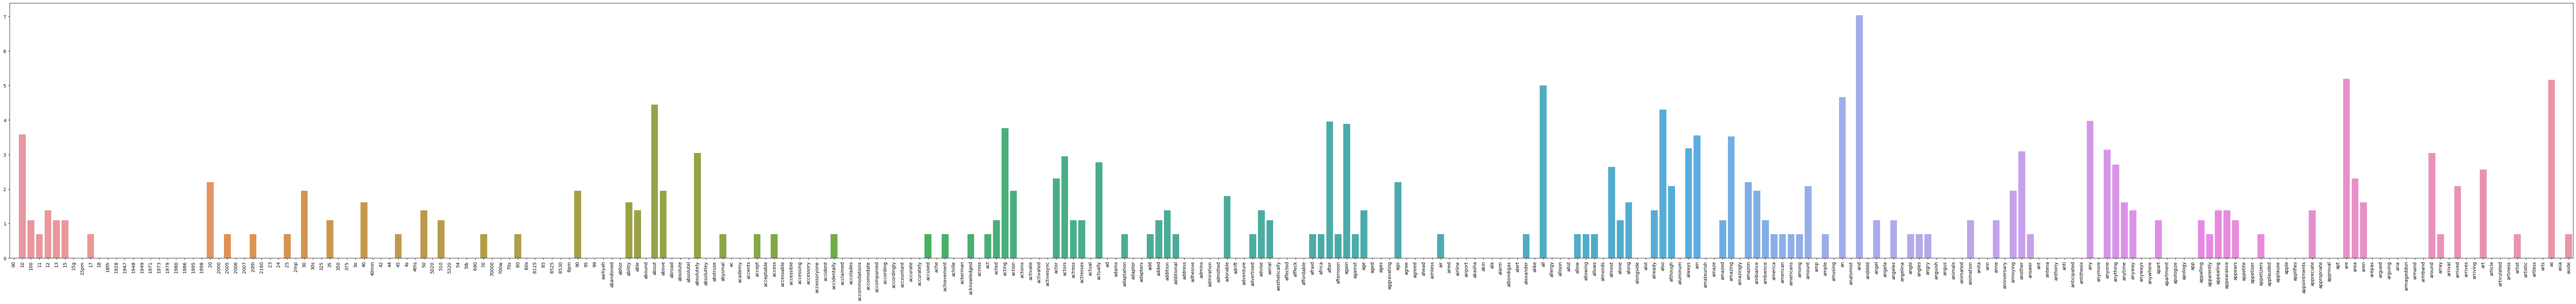

In [210]:
# plot bar chart using log of term frequency
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

### Discretization and Binarization

In [211]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [212]:
# convert labels to one hot encoding
mlb = preprocessing.LabelBinarizer()

In [213]:
mlb.fit(X.sentiment)

LabelBinarizer()

In [214]:
X['bin_sentiment'] = mlb.transform(X.sentiment).tolist()

In [215]:
X[0:9]

,sentence,score,sentiment,source,unigrams,bin_sentiment
0,So there is no way for me to plug it in here i...,0,negative,amazon,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,positive,amazon,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,positive,amazon,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,negative,amazon,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,positive,amazon,"[The, mic, is, great, .]",[1]
5,I have to jiggle the plug to get it to line up...,0,negative,amazon,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]
6,If you have several dozen or several hundred c...,0,negative,amazon,"[If, you, have, several, dozen, or, several, h...",[0]
7,If you are Razr owner...you must have this!,1,positive,amazon,"[If, you, are, Razr, owner, ..., you, must, ha...",[1]
8,"Needless to say, I wasted my money.",0,negative,amazon,"[Needless, to, say, ,, I, wasted, my, money, .]",[0]


## Data Exploration

In [216]:
document_to_transform_1 = []
random_record_1 = X.iloc[10]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[1000]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[2454]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

In [217]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['And the sound quality is great.']
['And those baby owls were adorable.']
['This is was due to the fact that it took 20 minutes to be acknowledged, then another 35 minutes to get our food...and they kept forgetting things.']


In [218]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [219]:
from sklearn.metrics.pairwise import cosine_similarity

# calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# print
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.166667
Cosine Similarity using count bw 1 and 3: 0.204124
Cosine Similarity using count bw 2 and 3: 0.068041
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


# Part 3

## Generate Meaningful New Data Visualizations

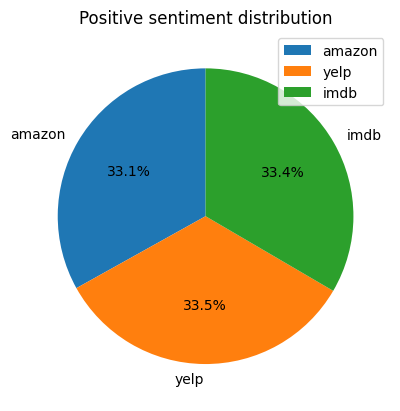

In [220]:
import matplotlib.pyplot as plt

# plot pie chart of positive sentiment distribution of the original data
frequency = [len(X.query('source == "amazon" and score == "1"')), len(X.query('source == "yelp" and score == "1"')), len(X.query('source == "imdb" and score == "1"'))]
labels = ['amazon', 'yelp', 'imdb']
plt.pie(frequency, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Positive sentiment distribution')
plt.legend()
plt.show()

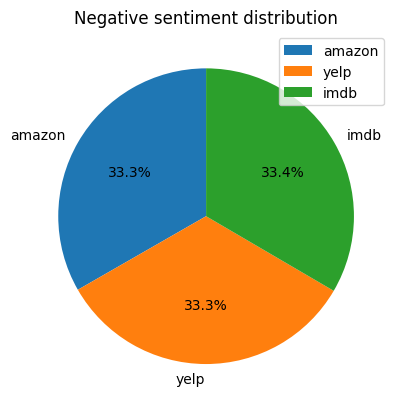

In [221]:
# plot pie chart of the negative distribution of the original data
frequency = [len(X.query('source == "amazon" and score == "0"')), len(X.query('source == "yelp" and score == "0"')), len(X.query('source == "imdb" and score == "0"'))]
plt.pie(frequency, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Negative sentiment distribution')
plt.legend()
plt.show()

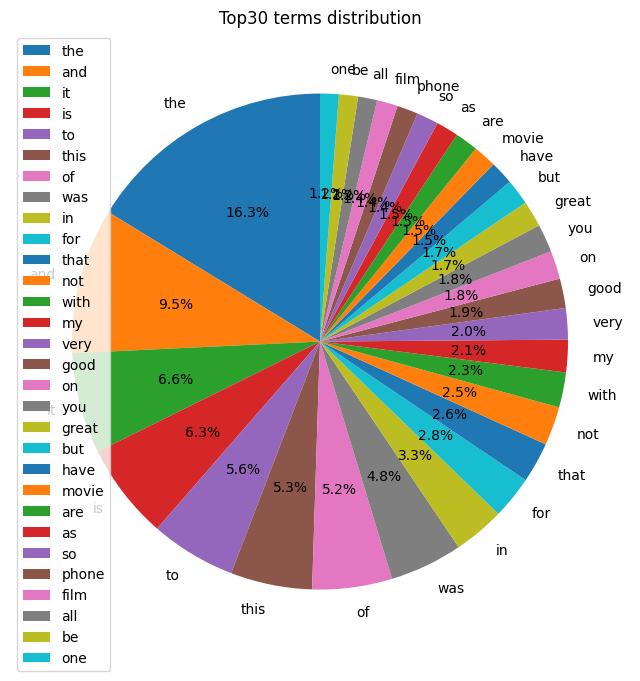

In [222]:
# plot pie chart of top30 terms distribution
plt.figure(figsize=(8, 12))
plt.pie(top30_frequency, labels=top30_term, autopct='%1.1f%%', startangle=90)
plt.title('Top30 terms distribution')
plt.legend()
plt.show()

## Generate TF-IDF Features

In [223]:
from sklearn.feature_extraction.text import TfidfVectorizer

# generate TF-IDF features using TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(X.sentence)
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(data=tfidf_matrix.toarray(), columns=feature_names)
display(tfidf_df)

,00,10,100,11,12,13,15,15g,15pm,17,...,yucky,yukon,yum,yummy,yun,z500a,zero,zillion,zombie,zombiez
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2981,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [224]:
# show the non-zero value in the TF-IDF feature matrix
non_zero_values = tfidf_df[tfidf_df != 0].stack().head
print(non_zero_values)

<bound method NDFrame.head of 0     by           0.223366
      converter    0.398455
      for          0.156412
      go           0.231491
      here         0.222747
                     ...   
2982  time         0.150881
      to           0.093810
      took         0.227225
      wasted       0.233123
      wound        0.293309
Length: 31515, dtype: float64>


## Implement Naive Bayes Classifier

In [225]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

#### Using Word Frequency Features

In [226]:
# partition dataset
X_train, X_test, y_train, y_test = train_test_split(X_counts, X.sentiment, test_size=0.2, random_state=42)

In [227]:
# initialize Naive Bayes model
naive_bayes_model = MultinomialNB()

In [228]:
# train model
naive_bayes_model.fit(X_train, y_train)

MultinomialNB()

In [229]:
# predict test set
y_pred = naive_bayes_model.predict(X_test)

In [230]:
# evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8241206030150754


In [231]:
# print report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.83      0.83      0.83       307
    positive       0.82      0.82      0.82       290

    accuracy                           0.82       597
   macro avg       0.82      0.82      0.82       597
weighted avg       0.82      0.82      0.82       597



#### Using TF-IDF Features

In [232]:
# partition dataset
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, X.sentiment, test_size=0.2, random_state=42)

In [233]:
# initialize Naive Bayes model
naive_bayes_model = MultinomialNB()

In [234]:
# train model
naive_bayes_model.fit(X_train, y_train)

MultinomialNB()

In [235]:
# predict test set
y_pred = naive_bayes_model.predict(X_test)

In [236]:
# evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8274706867671692


In [237]:
# print report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.84      0.83      0.83       307
    positive       0.82      0.83      0.82       290

    accuracy                           0.83       597
   macro avg       0.83      0.83      0.83       597
weighted avg       0.83      0.83      0.83       597



#### Difference
Based on the result shows above, we can observe that using TF-IDF features to implement Naive Bayes classifier is better than using word frequency features in terms of the precision, recall and f1-score in the report. I think the reason is that the word frequency features don't take account of the importance of words in the entire corpus, leading to the possibility that it may be influenced by the length of the document. As for the TF-IDF features, they considers the overall significant of each word, allowing for a better capture of keywords.

# Part 4

## Sampling

### Notice
In the original way, we use .sample() to get the random sampling, so the distribution of categories of the sampled data may not be equal to the original one. It may change the weight of each category leading to incorrect result to the follow-up process.

In [238]:
X_sampling = X.sample(n=1000)

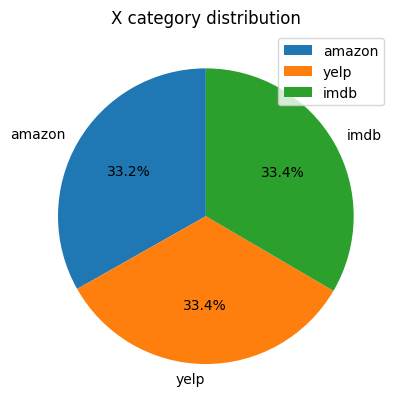

In [239]:
frequency = [len(X.query('source == "amazon"')), len(X.query('source == "yelp"')), len(X.query('source == "imdb"'))]
labels = ['amazon', 'yelp', 'imdb']
plt.pie(frequency, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('X category distribution')
plt.legend()
plt.show()

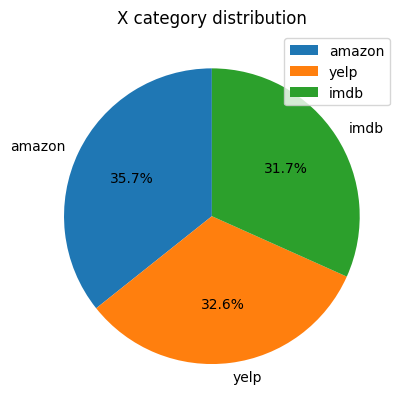

In [240]:
frequency = [len(X_sampling.query('source == "amazon"')), len(X_sampling.query('source == "yelp"')), len(X_sampling.query('source == "imdb"'))]
labels = ['amazon', 'yelp', 'imdb']
plt.pie(frequency, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('X category distribution')
plt.legend()
plt.show()

### Improvement
Can utilize sklearn's StratifiedShuffleSplit to maintain the distribution of categories during sampling

In [241]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_index, test_index in splitter.split(X.sentence, X.source):
    X_sampling = X.iloc[test_index]
print(X_sampling)

                                               sentence score sentiment  \
2847  In fact I'm going to round up to 4 stars, just...     1  positive   
2722  The food was great as always, compliments to t...     1  positive   
2026         - They never brought a salad we asked for.     0  negative   
1420                                      It just blew.     0  negative   
1577  The film's sole bright spot was Jonah Hill (wh...     1  positive   
...                                                 ...   ...       ...   
1823   I struggle to find anything bad to say about it.     1  positive   
2931  If you want to wait for mediocre food and down...     0  negative   
644   I contacted the company and they told me that,...     0  negative   
1711         Lame would be the best way to describe it.     0  negative   
1046     The story itself is just predictable and lazy.     0  negative   

      source                                           unigrams bin_sentiment  
2847    yelp  [In, 

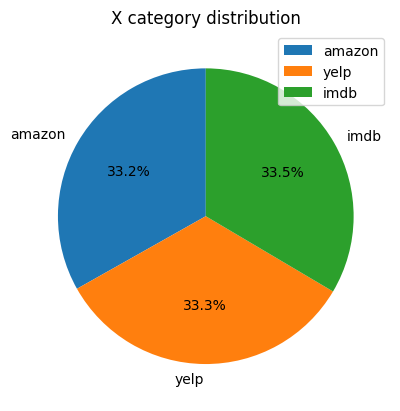

In [242]:
frequency = [len(X_sampling.query('source == "amazon"')), len(X_sampling.query('source == "yelp"')), len(X_sampling.query('source == "imdb"'))]
labels = ['amazon', 'yelp', 'imdb']
plt.pie(frequency, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('X category distribution')
plt.legend()
plt.show()

## Discretization and Binarization

### Notice
In the orginal way, we use LabelBinarizer to generate one hot encoding. The drawback is that LabelBinarizer can only handle single row instead of whole DataFrame, so if we want to generate one hot encoding of multiple row, the function will be called many times.

### Improvement
Using pandas.get_dummies for generate one hot encoding of the entire DataFrame:
The pandas.get_dummies function allows to generate one hot encoding of the entire DataFrame at once. This makes it more efficient to handle multiple rows, and it can automatically handle missing values.

In [246]:
print(X.source)

0       amazon
1       amazon
2       amazon
3       amazon
4       amazon
         ...  
2995      yelp
2996      yelp
2997      yelp
2998      yelp
2999      yelp
Name: source, Length: 2983, dtype: object


In [247]:
data_encoded = pd.get_dummies(X.source, drop_first=False)
print(data_encoded)

      amazon  imdb  yelp
0          1     0     0
1          1     0     0
2          1     0     0
3          1     0     0
4          1     0     0
...      ...   ...   ...
2995       0     0     1
2996       0     0     1
2997       0     0     1
2998       0     0     1
2999       0     0     1

[2983 rows x 3 columns]
